[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TechKnowGram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Available columns in dataset: Index(['ID', 'Text', 'Label'], dtype='object')
                  ID                                               Text  Label
0         @Islami932                             শিবির একটি আদর্শ সংগঠন      1
1  @sumonaakther4303                                        জামাত বেস্ট      1
2        @HabibHujut                   ইসলামী ছাত্রশিবির জিন্দাবাদ ❤️☝️      1
3       @mdsujan9311  ছাত্রশিবিরের সভাপতি এটা গর্ব করার কোন দরকার ছি...      1
4  @KadijaKadija-e2m                                                  ❤      1
Missing values per column:
 ID       0
Text     0
Label    0
dtype: int64


c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2486 (\N{BENGALI LETTER SHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2476 (\N{BENGALI LETTER BA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2480 (\N{BENGALI LETTER RA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2438 (\N{BENGALI LETTER AA}) missing 

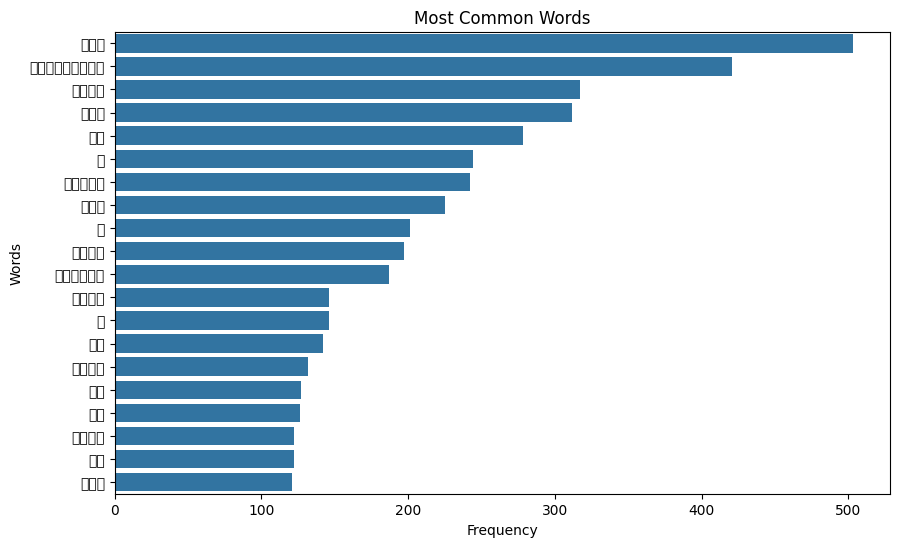

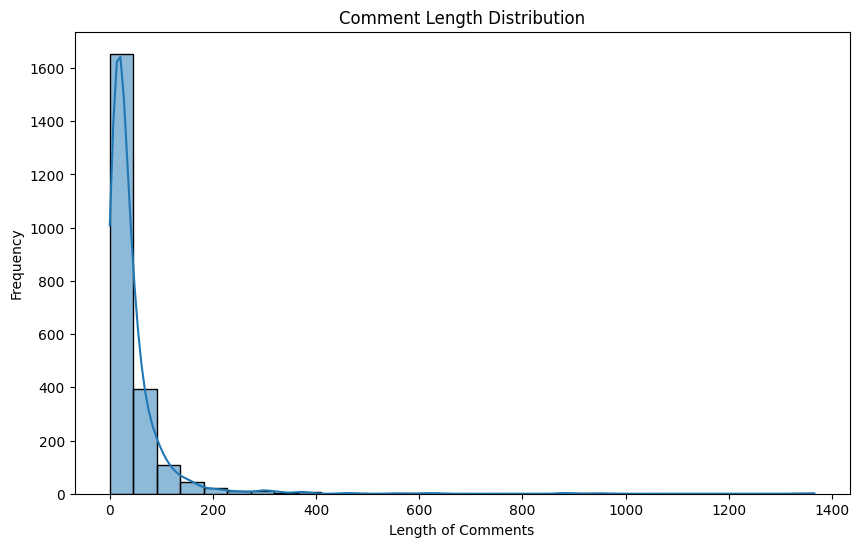

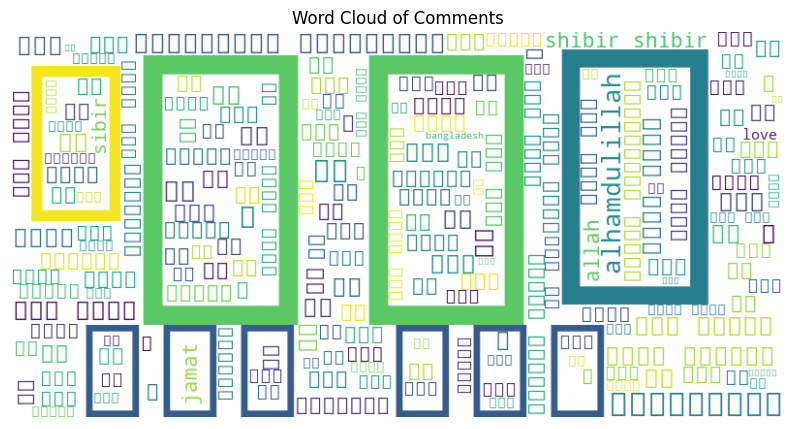

In [11]:
#EDA (Exploratory Data Analysis)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download the stopwords resource if not already present
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('youtube_comments.csv')

# Set the correct column name for comments
COMMENT_COLUMN = 'Text'

# Checking the first few rows and columns
print("Available columns in dataset:", df.columns)
print(df.head())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing comments
df = df.dropna(subset=[COMMENT_COLUMN])

# Text Preprocessing
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Zঅ-হ0-9\s]', '', text)  # Keep Bengali, English alphabetic, and digits
    text = text.lower()  # Convert to lowercase for consistency
    text = text.strip()  # Remove leading/trailing whitespace
    return text

df['cleaned_comment'] = df[COMMENT_COLUMN].apply(clean_text)

# Tokenization (currently using English stopwords, replace with Bengali if available)
stop_words = set(stopwords.words('english'))
df['tokens'] = df['cleaned_comment'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Word frequency visualization
all_words = [word for tokens in df['tokens'] for word in tokens]
word_counts = Counter(all_words)
common_words = word_counts.most_common(20)

# Plot most frequent words
words, counts = zip(*common_words) if common_words else ('', 0)
if common_words:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title("Most Common Words")
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.show()

# Comment length distribution
df['comment_length'] = df['cleaned_comment'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['comment_length'], kde=True, bins=30)
plt.title("Comment Length Distribution")
plt.xlabel("Length of Comments")
plt.ylabel("Frequency")
plt.show()

# Word cloud visualization
if all_words:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Comments")
    plt.show()

2) Apply Any Cleaning Techniques If Needed

In [16]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Function to clean text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Load the CSV file
df = pd.read_csv('youtube_comments.csv', header=None, names=['ID', 'Text', 'Label'])

# Apply cleaning to the Text column
stop_words = set(stopwords.words('english'))  # List of stopwords

df['cleaned_text'] = df['Text'].apply(clean_text)
df['tokens'] = df['cleaned_text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Display the updated DataFrame
print(df.head())

                  ID                                               Text  \
0                 ID                                               Text   
1         @Islami932                             শিবির একটি আদর্শ সংগঠন   
2  @sumonaakther4303                                        জামাত বেস্ট   
3        @HabibHujut                   ইসলামী ছাত্রশিবির জিন্দাবাদ ❤️☝️   
4       @mdsujan9311  ছাত্রশিবিরের সভাপতি এটা গর্ব করার কোন দরকার ছি...   

   Label cleaned_text  tokens  
0  Label         text  [text]  
1      1                   []  
2      1                   []  
3      1                   []  
4      1                   []  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TechKnowGram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TechKnowGram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


3) Visualize Word Cloud python Copy code


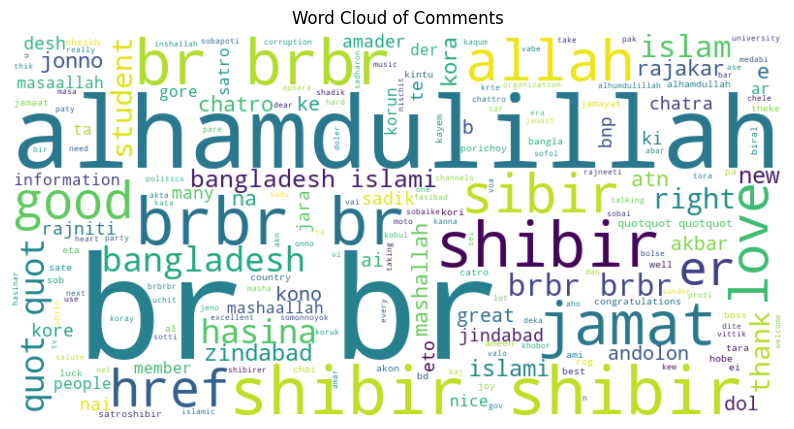

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single string for word cloud
all_words = ' '.join([' '.join(tokens) for tokens in df['tokens']])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Comments")
plt.show()


4) Visualize Most Frequent Words With Their Numbers

C:\Users\TechKnowGram\AppData\Local\Temp\ipykernel_18680\765868725.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


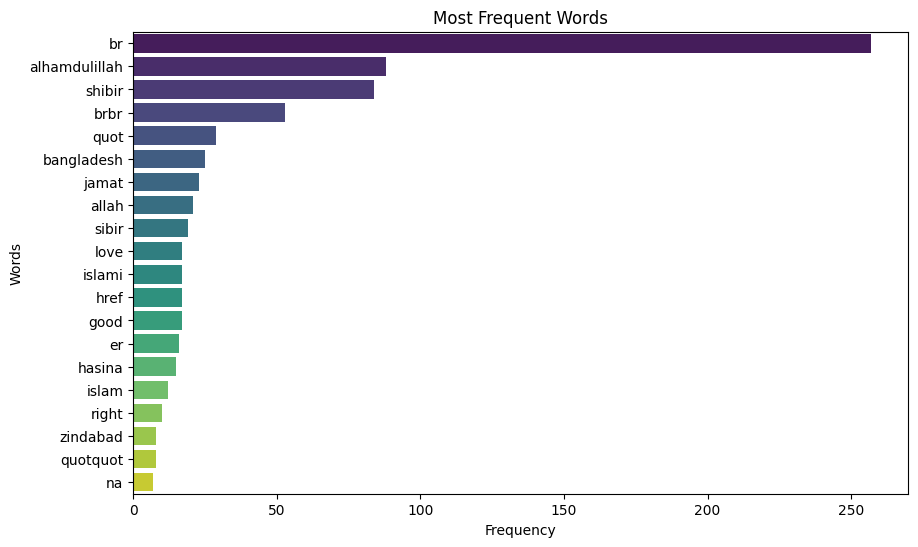

In [18]:
from collections import Counter
import seaborn as sns

# Calculate word frequencies
word_counts = Counter([word for tokens in df['tokens'] for word in tokens])
common_words = word_counts.most_common(20)  # Top 20 most common words

# Plot most frequent words
words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


5) Check for Dataset Problems and Improve

In [20]:
import pandas as pd

# Load dataset
df = pd.read_csv('youtube_comments.csv')

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows with missing comments
df = df.dropna(subset=['Text'])  # Replace 'Text' with the actual column name if different

# Check for duplicates
duplicates = df.duplicated(subset=['Text']).sum()
print(f"Number of duplicate comments: {duplicates}")

# Drop duplicate comments
df = df.drop_duplicates(subset=['Text'])

# Validate the improvements
print("Dataset after cleaning:")
print(f"Number of rows: {df.shape[0]}")

Missing values:
 ID       0
Text     0
Label    0
dtype: int64
Number of duplicate comments: 310
Dataset after cleaning:
Number of rows: 1948


6) Sentiment Analysis Model with Multiple Classifiers

In [22]:
import re
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset (ensure 'youtube_comments.csv' is the correct path)
df = pd.read_csv('youtube_comments.csv')

# Clean text function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Use the correct column name for comments
df['cleaned_comment'] = df['Text'].apply(clean_text)  # Assuming 'Text' is the correct name

# Create labels (assume binary classification: positive/negative)
df['sentiment'] = df['cleaned_comment'].apply(
    lambda x: 1 if 'good' in x or 'great' in x else 0
)  # Adjust the logic as per the actual sentiment words in your dataset

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_comment'],
    df['sentiment'],
    test_size=0.2,
    random_state=42
)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Check the first few records to validate the cleaning process
print(df.head())


                  ID                                               Text  \
0         @Islami932                             শিবির একটি আদর্শ সংগঠন   
1  @sumonaakther4303                                        জামাত বেস্ট   
2        @HabibHujut                   ইসলামী ছাত্রশিবির জিন্দাবাদ ❤️☝️   
3       @mdsujan9311  ছাত্রশিবিরের সভাপতি এটা গর্ব করার কোন দরকার ছি...   
4  @KadijaKadija-e2m                                                  ❤   

   Label cleaned_comment  sentiment  
0      1                          0  
1      1                          0  
2      1                          0  
3      1                          0  
4      1                          0  


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 1. Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_vec, y_train)
logistic_preds = logistic_model.predict(X_test_vec)
logistic_acc = accuracy_score(y_test, logistic_preds)
print("Logistic Regression Accuracy:", logistic_acc)

# 2. Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_preds)
print("Naive Bayes Accuracy:", nb_acc)

# 3. Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_vec, y_train)
svm_preds = svm_model.predict(X_test_vec)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_acc)

# 4. Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vec, y_train)
rf_preds = rf_model.predict(X_test_vec)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

# 5. LSTM Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Tokenize text for LSTM
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100)

lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_seq, np.array(y_train), epochs=5, batch_size=64, validation_split=0.2)

lstm_preds = lstm_model.predict(X_test_seq) > 0.5
lstm_acc = accuracy_score(y_test, lstm_preds)
print("LSTM Accuracy:", lstm_acc)

# Summary of Results
print("Comparison of Model Accuracies:")
print(f"Logistic Regression: {logistic_acc:.2f}")
print(f"Naive Bayes: {nb_acc:.2f}")
print(f"SVM: {svm_acc:.2f}")
print(f"Random Forest: {rf_acc:.2f}")
print(f"LSTM: {lstm_acc:.2f}")


Logistic Regression Accuracy: 0.9911504424778761
Naive Bayes Accuracy: 0.9911504424778761
SVM Accuracy: 0.9933628318584071
Random Forest Accuracy: 1.0


c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.8346 - loss: 0.2966 - val_accuracy: 0.9917 - val_loss: 0.0473
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9866 - loss: 0.0686 - val_accuracy: 0.9917 - val_loss: 0.0458
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.9896 - loss: 0.0550 - val_accuracy: 0.9917 - val_loss: 0.0441
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9952 - loss: 0.0287 - val_accuracy: 0.9917 - val_loss: 0.0422
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9910 - loss: 0.0446 - val_accuracy: 0.9917 - val_loss: 0.0392
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
LSTM Accuracy: 0.9911504424778761
Comparison of Model Accuracies:
Logistic Regression: 0.99
Naive Bayes: 0.99
SVM: 0.99
Random Forest: 1.00
LSTM: 0.99


7) Build a Sentiment Analysis Chatbot

In [24]:
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Text preprocessing function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Train a simple sentiment analysis model (reuse data and vectorizer from previous task)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(df['cleaned_comment']).toarray()

logistic_model = LogisticRegression()
logistic_model.fit(X_train_vec, df['sentiment'])

# Chatbot for sentiment prediction
def sentiment_chatbot():
    print("Chatbot: Hi! Enter a comment, and I'll predict its sentiment. Type 'exit' to stop.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        cleaned_input = clean_text(user_input)
        input_vector = vectorizer.transform([cleaned_input]).toarray()
        prediction = logistic_model.predict(input_vector)
        sentiment = "Positive" if prediction[0] == 1 else "Negative"
        print(f"Chatbot: This is a {sentiment} comment.")

# Start the chatbot
sentiment_chatbot()


Chatbot: Hi! Enter a comment, and I'll predict its sentiment. Type 'exit' to stop.
Chatbot: This is a Negative comment.
Chatbot: Goodbye!


In [26]:
import shap
import matplotlib.pyplot as plt

# Explainer setup for logistic regression
explainer = shap.LinearExplainer(logistic_model, vectorizer.transform(df['cleaned_comment']), feature_perturbation="interventional")

# Chatbot with explanation
def explainable_chatbot():
    print("Chatbot: Hi! Enter a comment, and I'll predict its sentiment and explain why. Type 'exit' to stop.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        cleaned_input = clean_text(user_input)
        input_vector = vectorizer.transform([cleaned_input]).toarray()
        prediction = logistic_model.predict(input_vector)
        sentiment = "Positive" if prediction[0] == 1 else "Negative"
        
        # Generate SHAP values
        shap_values = explainer(input_vector)
        
        # Extract most important words
        top_features = sorted(zip(vectorizer.get_feature_names_out(), shap_values.values[0]), key=lambda x: abs(x[1]), reverse=True)[:3]
        reasons = ", ".join([f"{word} ({'+' if value > 0 else '-'}{abs(value):.2f})" for word, value in top_features])
        
        print(f"Chatbot: This is a {sentiment} comment.")
        print(f"Chatbot: Top reasons: {reasons}")

# Start the chatbot
explainable_chatbot()


c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\TechKnowGram\Downloads\task\venv\Lib\site-packages\shap\explainers\_linear.py:95: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


Chatbot: Hi! Enter a comment, and I'll predict its sentiment and explain why. Type 'exit' to stop.
Chatbot: This is a Negative comment.
Chatbot: Top reasons: br (+0.05), good (-0.03), man (-0.00)
Chatbot: Goodbye!


8) Build a Chatbot That Explains Sentiment Using LLM Techniques

In [27]:
import openai

# Set up OpenAI API key
openai.api_key = ""

def llm_chatbot():
    print("Chatbot: Hi! Enter a comment, and I'll predict its sentiment and explain why. Type 'exit' to stop.")
    while True:
        user_input = input("You: ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        
        # Query OpenAI GPT model
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a helpful assistant that performs sentiment analysis and explains it."},
                {"role": "user", "content": f"Analyze the sentiment of this comment: '{user_input}' and explain why."}
            ]
        )
        
        # Extract response
        answer = response['choices'][0]['message']['content']
        print(f"Chatbot: {answer}")

# Start the chatbot
llm_chatbot()


Chatbot: Hi! Enter a comment, and I'll predict its sentiment and explain why. Type 'exit' to stop.
Chatbot: The sentiment of the comment "hi" is neutral. This is because the word "hi" is a simple greeting that does not convey any strong emotions or opinions. It is a standard and polite way to greet someone, without any positive or negative feelings attached to it.
Chatbot: Goodbye!


9) Build a language translation chatbot using various LLM Techniques If I give the comments as input and I also provide the language of response. for example if I select English as response it will response in english language. If I select english and China - the chatbot will answer in both languages

In [28]:
import openai

# Set OpenAI API Key
openai.api_key = ""

# Supported languages and their codes
supported_languages = {
    "english": "en",
    "chinese": "zh",
    "spanish": "es",
    "french": "fr",
    "german": "de",
    "hindi": "hi",
    "japanese": "ja",
}

def translate_text(comment, languages):
    """
    Translate the given comment into the specified languages using GPT.
    
    :param comment: str, The input comment to translate.
    :param languages: list, The list of languages to translate into.
    :return: str, Translated text for all specified languages.
    """
    translations = []
    
    for language in languages:
        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a language translation assistant."},
                {"role": "user", "content": f"Translate this text into {language}: {comment}"}
            ]
        )
        translated_text = response['choices'][0]['message']['content']
        translations.append(f"{language.capitalize()}: {translated_text.strip()}")
    
    return "\n".join(translations)

def translation_chatbot():
    print("Chatbot: Hi! Enter a comment, and I'll translate it for you. Type 'exit' to stop.")
    print(f"Chatbot: Supported languages are: {', '.join(supported_languages.keys())}")
    
    while True:
        # Input comment
        user_input = input("You (Enter your comment): ")
        if user_input.lower() == 'exit':
            print("Chatbot: Goodbye!")
            break
        
        # Input target languages
        target_languages = input("You (Enter the target languages separated by commas): ").lower().split(",")
        target_languages = [lang.strip() for lang in target_languages]
        
        # Validate languages
        invalid_languages = [lang for lang in target_languages if lang not in supported_languages]
        if invalid_languages:
            print(f"Chatbot: Unsupported languages: {', '.join(invalid_languages)}. Please try again.")
            continue
        
        # Translate and respond
        translations = translate_text(user_input, target_languages)
        print(f"Chatbot:\n{translations}")

# Start the chatbot
translation_chatbot()


Chatbot: Hi! Enter a comment, and I'll translate it for you. Type 'exit' to stop.
Chatbot: Supported languages are: english, chinese, spanish, french, german, hindi, japanese
Chatbot:
Chinese: 你好
Chatbot: Goodbye!
